In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matlab_lib import loadmat

%load_ext autoreload
%autoreload 2

import plots_lib

ModuleNotFoundError: No module named 'matlab_lib'

In [6]:
matDict = {
    'left' : loadmat("../data/exampledata_left.mat")['input_field1'],
    'right' : loadmat("../data/exampledata_right.mat")['input_field2']
}

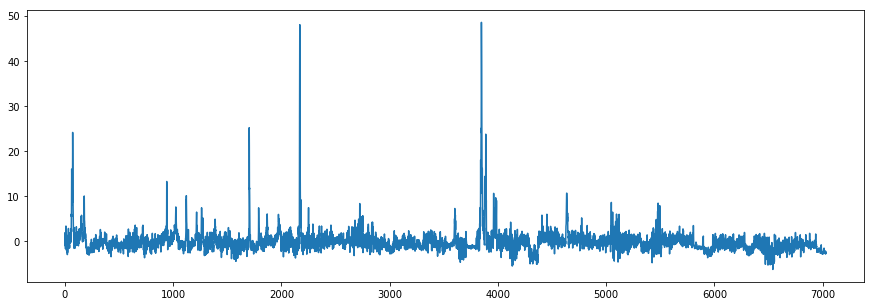

In [7]:
plt.figure(figsize=(15,5))
plt.plot(matDict['left'][3].flatten())
plt.show()

##### Investigate baseline

The neuronal baseline will be computed as the n-th lowest percentile. User can validate the baseline selection by observing histograms of a few example cells 

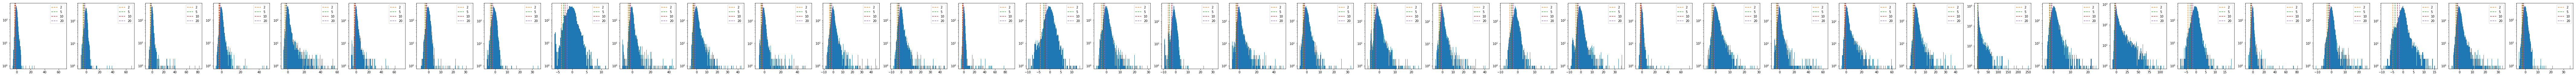

In [8]:
plots_lib.plot_baseline_percentile(matDict['left'])

## Ordering for data

1. Subtract minimum and normalize
2. Compute CDF
3. Subtract CDF and integrate

**TODO**:
* Try separate cells that are unorderable compared to everything (not sure how)
* Try from another period(delay vs action vs ...)
* Try predict behaviour (turn left-right) from orderable vs unorderable cells

In [10]:
percentileBaseline = 30 # Out of 100
nClusterAim = [7, 5]            # Determines number of clusters
thrBivar = [0.297, 0.322]       # Bivariate order statistic threshold for p=[5%, 1%]
thrMulti = [0.12, 0.135]        # Multivariate order statistic threshold for p=[5%, 1%]

for iDataSet, (dataLabel, dataMat) in enumerate(matDict.items()):
    ###########################
    # Sorting
    ###########################
    
    # Rescale original data
    matRescaled = np.copy(dataMat)
    nCell, nTrial, nTime = matRescaled.shape
    print("Processing data (nCell, nTrial, nTime) =", matRescaled.shape)

    comparisonsByTrial = np.zeros((nTrial, nCell, nCell))
    for iTrial in range(nTrial):
        # Rescale all data for this trial
        for iCell in range(nCell):
            matRescaled[iCell, iTrial] = rescale(matRescaled[iCell, iTrial], percentileBaseline)
        comparisonsByTrial[iTrial] = order_func(matRescaled[:, iTrial])

    # Compute order metric for every 
    metricByConn = order_metric(comparisonsByTrial)
    
    # Make orderability plots
    orderability_plots(metricByConn, thrBivar[iDataSet])
    
    ###########################
    # Clustering
    ###########################
    
    # Perform clustering
    clustering = cluster_dist_matrix(metricByConn, nClusterAim[iDataSet])  # Cluster index for each node
    
    # Construct clustering plots
    clustering_plots(matRescaled, metricByConn, clustering)
        
plt.show()

Processing data (nCell, nTrial, nTime) = (38, 74, 95)


NameError: name 'rescale' is not defined

## Validation V1

Cycle all signals by a random number

Processing data (nCell, nTrial, nTime) = (38, 74, 95)
1% cutoff 0.2432432432432432
Mean order param 0.0874245511514359
Number above 1% 0.008534850640113799
Processing data (nCell, nTrial, nTime) = (31, 59, 95)
1% cutoff 0.2542372881355932
Mean order param 0.08656825223254964
Number above 1% 0.002150537634408602


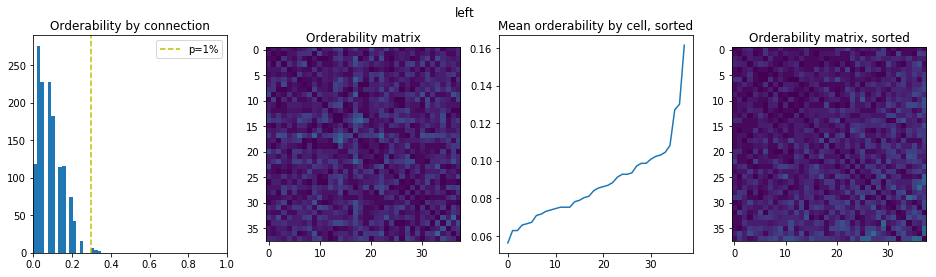

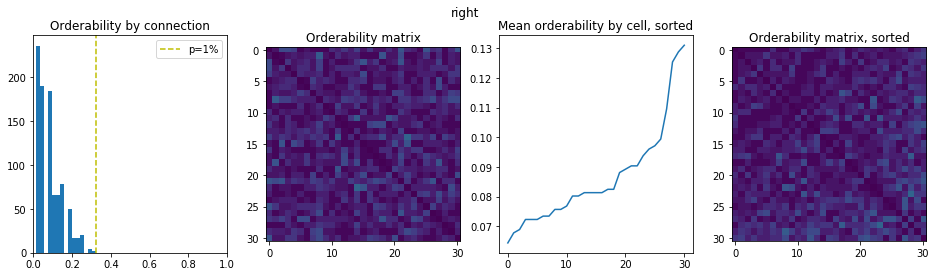

In [6]:
percentileBaseline = 30 # Out of 100
thrBivar = [0.297, 0.322]       # Bivariate order statistic threshold for p=[5%, 1%]

for iDataSet, (dataLabel, dataMat) in enumerate(matDict.items()):
    ###########################
    # Sorting
    ###########################
    
    # Rescale original data
    matRescaled = np.copy(dataMat)
    nCell, nTrial, nTime = matRescaled.shape
    print("Processing data (nCell, nTrial, nTime) =", matRescaled.shape)

    comparisonsByTrial = np.zeros((nTrial, nCell, nCell))
    for iCell in range(nCell):
        for iTrial in range(nTrial):    
            matRescaled[iCell, iTrial] = rescale(matRescaled[iCell, iTrial], percentileBaseline)
            
            # Add cycling
            nCycle = np.random.randint(0, nTime)
            matRescaled[iCell, iTrial] = cycle_data(matRescaled[iCell, iTrial], nCycle)
        
    for iTrial in range(nTrial):        
        comparisonsByTrial[iTrial] = order_func(matRescaled[:, iTrial])

    # Compute order metric for every 
    metricByConn = order_metric(comparisonsByTrial)
    
    print("1% cutoff", np.percentile(metricByConn[~np.eye(nCell, dtype=bool)], 99))
    
    # Make orderability plots
    orderability_plots(metricByConn, thrBivar[iDataSet])
        
plt.show()

# Validation 2

Shuffle each trial by cells

Processing data (nCell, nTrial, nTime) = (38, 74, 95)
1% cutoff 0.32432432432432434
Mean order param 0.10118795894044827
Number above 1% 0.021337126600284494
Processing data (nCell, nTrial, nTime) = (31, 59, 95)
1% cutoff 0.2881355932203389
Mean order param 0.08970293420812829
Number above 1% 0.002150537634408602


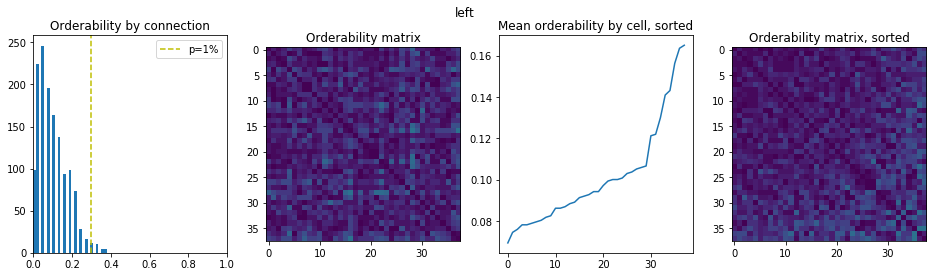

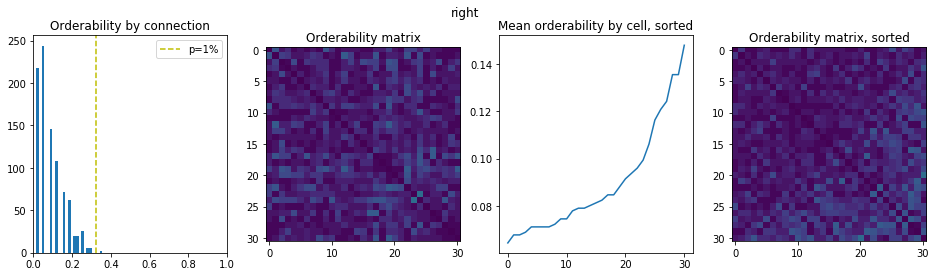

In [7]:
percentileBaseline = 30 # Out of 100
thrBivar = [0.297, 0.322]       # Bivariate order statistic threshold for p=[5%, 1%]

for iDataSet, (dataLabel, dataMat) in enumerate(matDict.items()):
    ###########################
    # Sorting
    ###########################
    
    # Rescale original data
    matRescaled = np.copy(dataMat)
    nCell, nTrial, nTime = matRescaled.shape
    print("Processing data (nCell, nTrial, nTime) =", matRescaled.shape)

    comparisonsByTrial = np.zeros((nTrial, nCell, nCell))
    for iTrial in range(nTrial):    
        for iCell in range(nCell):
            matRescaled[iCell, iTrial] = rescale(matRescaled[iCell, iTrial], percentileBaseline)
            
        cellPerm = np.random.permutation(nCell)
        comparisonsByTrial[iTrial] = order_func(matRescaled[cellPerm, iTrial])

    # Compute order metric for every 
    metricByConn = order_metric(comparisonsByTrial)
    
    print("1% cutoff", np.percentile(metricByConn[~np.eye(nCell, dtype=bool)], 99))
    
    # Make orderability plots
    orderability_plots(metricByConn, thrBivar[iDataSet])
        
plt.show()